In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

In [15]:
# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32


# Directories
data_dir = "Dataset"
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

In [16]:
# Load and preprocess data
def load_data(data_dir):
    X, Y = [], []
    labels = {'0': 0, '1': 1}  # Folder names 0 and 1 correspond to labels
    for label, idx in labels.items():
        folder = os.path.join(data_dir, label)
        for file in os.listdir(folder):
            if file.endswith('.jpg'):
                img_path = os.path.join(folder, file)
                img = cv2.imread(img_path)
                img_resized = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
                X.append(img_resized)
                Y.append(idx)
    return np.array(X), np.array(Y)

In [17]:
X_train, Y_train = load_data(train_dir)
X_valid, Y_valid = load_data(valid_dir)
X_test, Y_test = load_data(test_dir)

# Normalize data
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# Convert labels to categorical
Y_train = to_categorical(Y_train, 2)
Y_valid = to_categorical(Y_valid, 2)
Y_test = to_categorical(Y_test, 2)

In [18]:
from tensorflow.keras.models import load_model

import tensorflow as tf

# Load the saved model
model = load_model('my_model.h5')
# Recompile the model


In [20]:
# Correcting the typo and calling the evaluate function properly
test_loss, test_accuracy = model.evaluate(X_train, Y_train)

# Print the results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9918 - loss: 0.4210
Test Accuracy: 98.79%
Test Loss: 0.4209


In [21]:
labels = ['Normal', 'Infected']
def predict_image(image_path):
    image = cv2.imread(image_path)
    img_resized = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    img_array = img_resized / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    plt.figure(figsize=(6, 4))
    img_display = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img_display)
    plt.title(f"Prediction: {labels[predicted_class]} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


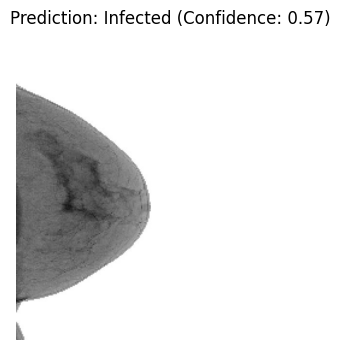

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


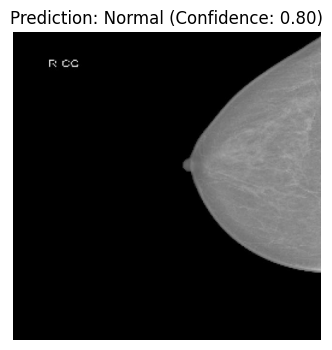

In [22]:
# Example usage of the prediction function
predict_image(r'Dataset\valid\1\1336_1475901500_png.rf.c23cede8de869f9845af5d09a3ca4bf5.jpg')
predict_image(r'Dataset\valid\0\5_940388076_png.rf.b61a6986ef24d48d9dabfdc4a4947ebb.jpg')
